In [2]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_metrics_v2(experiment_dirs, metrics_to_track={"coco/bbox_mAP", "coco/bbox_mAP_50"}, title="Validation Metrics over Epochs"):
    """
    Plots metrics from experiment logs, showing the mean and standard deviation for multiple runs.
    Uses different colors for experiments and different linestyles for metrics, with separate legends.

    Args:
        experiment_dirs (list): A list of directories, where each directory contains multiple runs.
        metrics_to_track (set): A set of metric names to plot.
        title (str): The title of the plot.
    """
    fig, ax = plt.subplots(figsize=(15, 7))
    
    colors = plt.get_cmap('tab10').colors
    linestyles = ['-', '--', ':', '-.']
    
    sorted_metrics = sorted(list(metrics_to_track))
    metric_linestyles = {metric: linestyles[i % len(linestyles)] for i, metric in enumerate(sorted_metrics)}

    experiment_names = []
    for color_idx, exp_dir in enumerate(experiment_dirs):
        log_files = glob.glob(os.path.join(exp_dir, '*/vis_data/scalars.json'))
        
        if not log_files:
            print(f"No log files found for {exp_dir}")
            continue

        exp_name = os.path.basename(exp_dir)
        experiment_names.append(exp_name)
        metric_data = {metric: defaultdict(list) for metric in metrics_to_track}

        for file_path in log_files:
            with open(file_path, "r") as f:
                for line in f:
                    try:
                        data = json.loads(line)
                        epoch = data.get("epoch", data.get("step", None))
                        if epoch is None:
                            continue

                        for metric in metrics_to_track:
                            if metric in data:
                                metric_data[metric][epoch].append(data[metric])
                    except json.JSONDecodeError:
                        continue
        
        color = colors[color_idx % len(colors)]

        for metric in sorted_metrics:
            if not metric_data[metric]:
                continue

            points = sorted(metric_data[metric].items())
            if not points:
                continue
                
            epochs, values_per_epoch = zip(*points)
            
            means = [np.mean(vals) for vals in values_per_epoch]
            stds = [np.std(vals) for vals in values_per_epoch]
            
            linestyle = metric_linestyles[metric]
            
            ax.plot(epochs, means, marker='o', linestyle=linestyle, color=color)
            ax.fill_between(epochs, np.array(means) - np.array(stds), np.array(means) + np.array(stds), alpha=0.2, color=color)

    # Create experiment legend (colors)
    exp_handles = [plt.Line2D([0], [0], color=colors[i % len(colors)], lw=2) for i, _ in enumerate(experiment_names)]
    exp_legend = ax.legend(exp_handles, experiment_names, title="Experiment", loc="best")
    ax.add_artist(exp_legend)

    # Create metric legend (linestyles)
    metric_handles = [plt.Line2D([0], [0], color='black', linestyle=metric_linestyles[m]) for m in sorted_metrics]
    metric_labels = [m.replace('coco/', '').replace('bbox_', '') for m in sorted_metrics]
    # ax.legend(metric_handles, metric_labels, title="Metric", loc="best")

    ax.set_title(title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Value")
    ax.grid(True)
    plt.tight_layout()
    plt.show()


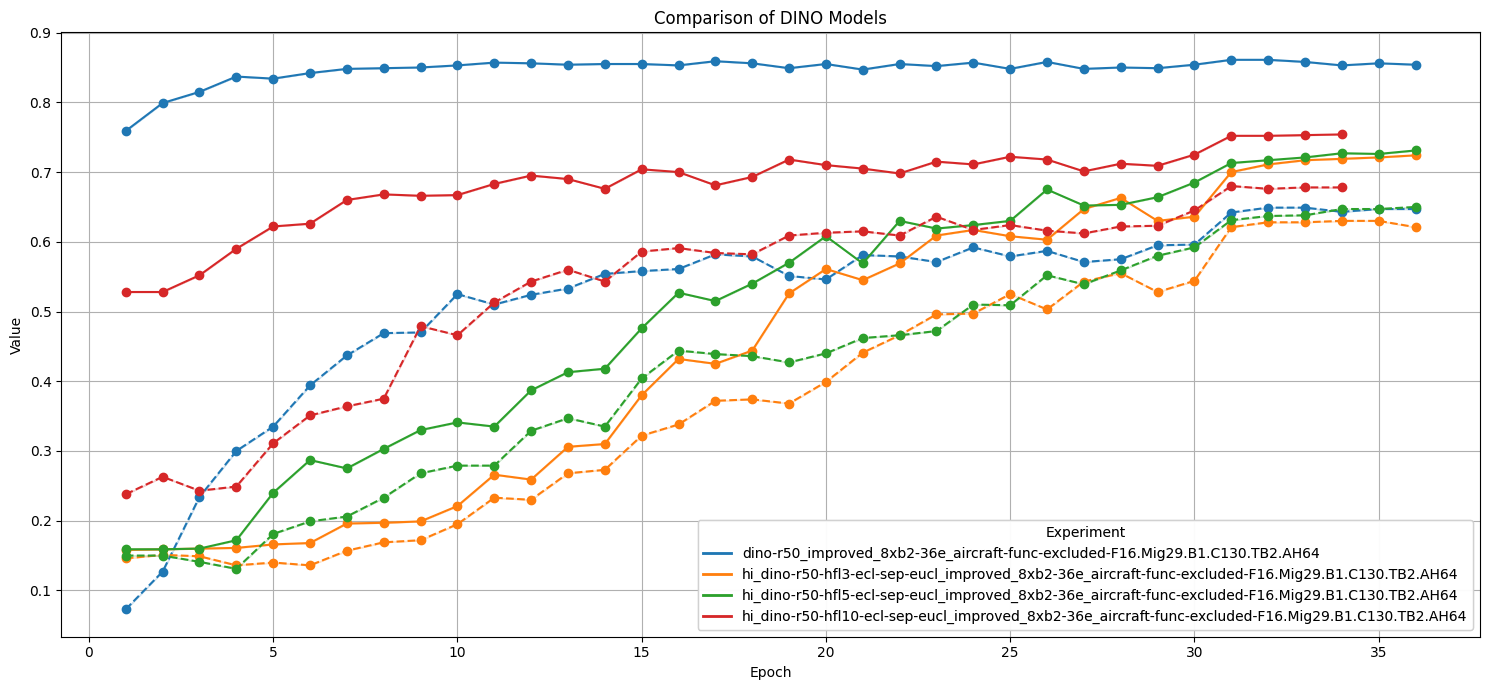

In [7]:
# experiment_dirs_to_plot = [
#     # "../work_dirs/dino-r50_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/dino-r50_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
#     "../work_dirs/embed_dino-r50-sep-eucl_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/embed_dino-r50-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
#     # "../work_dirs/hi_dino-r50-hfl1-sep-eucl_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/hi_dino-r50-hfl2-sep-eucl_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/hi_dino-r50-hfl3-ecl-sep-raw-eucl_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/hi_dino-r50-hfl3-sep-eucl_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/hi_dino-r50-hfl5-sep-eucl_improved_8xb2-36e_aircraft-func",
#     "../work_dirs/hi_dino-r50-hfl10-sep-eucl_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/hi_dino-r50-hfl10-ecl-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
#     # "../work_dirs/hi_dino-r50-hfl20-sep-eucl_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/hi_dino-r50-hfl30-sep-eucl_improved_8xb2-36e_aircraft-func",
#     # "../work_dirs/hi_dino-r50-hfl50-sep-eucl_improved_8xb2-36e_aircraft-func",
# ]
experiment_dirs_to_plot = [
    # "../work_dirs/dino-r50_improved_8xb2-36e_aircraft-func",
    "../work_dirs/dino-r50_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
    # "../work_dirs/embed_dino-r50-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
    # "../work_dirs/hi_dino-r50-hfl1-ecl-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
    # "../work_dirs/hi_dino-r50-hfl2-ecl-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
    "../work_dirs/hi_dino-r50-hfl3-ecl-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
    # "../work_dirs/hi_dino-r50-hfl3-sep-eucl_improved_8xb2-36e_aircraft-func",
    "../work_dirs/hi_dino-r50-hfl5-ecl-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
    "../work_dirs/hi_dino-r50-hfl10-ecl-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
    
    # "../work_dirs/hi_dino-r50-hfl10-sep-eucl_improved_8xb2-36e_aircraft-func",
    # "../work_dirs/hi_dino-r50-hfl10-ecl-sep-eucl_improved_8xb2-36e_aircraft-func-excluded-F16.Mig29.B1.C130.TB2.AH64",
]

plot_metrics_v2(experiment_dirs_to_plot, metrics_to_track={"coco/bbox_mAP", "coco/bbox_AR@100"}, title="Comparison of DINO Models")

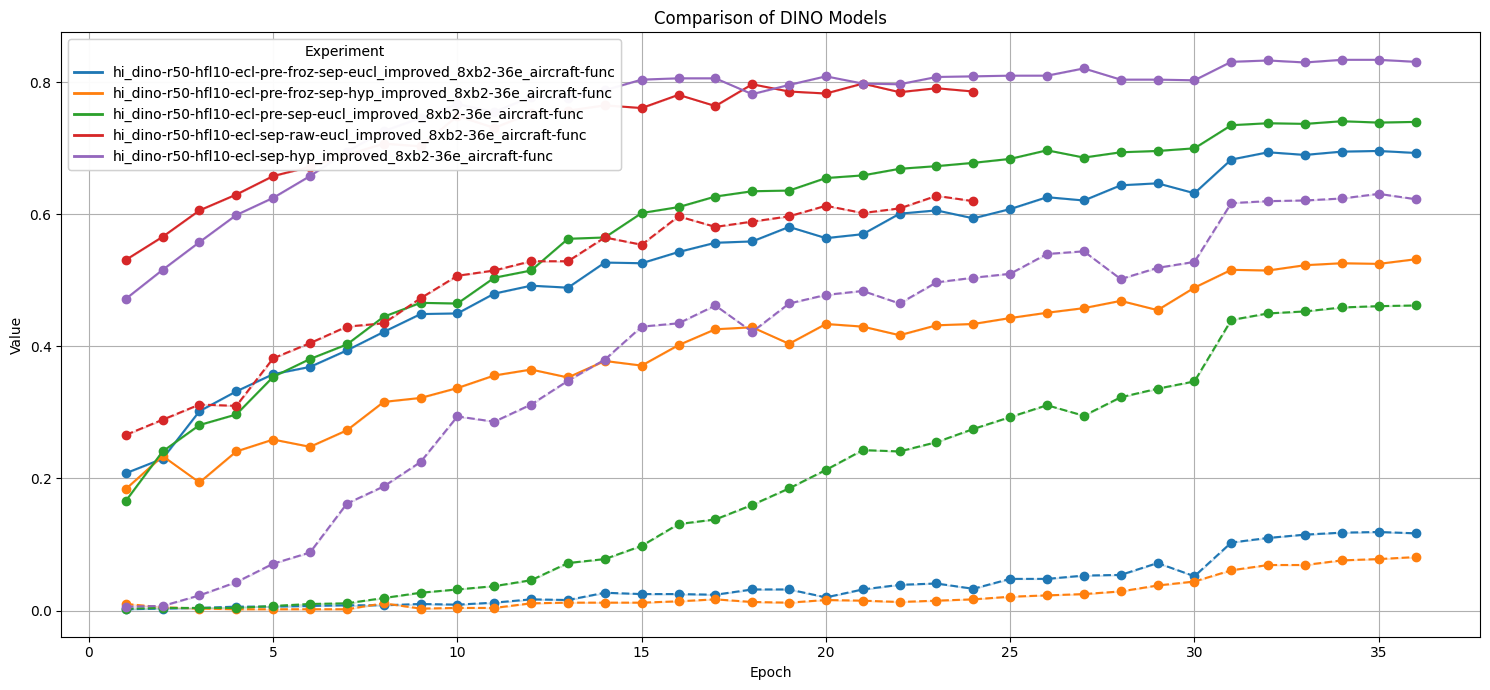

In [13]:
experiment_dirs_to_plot = [
    "../work_dirs/hi_dino-r50-hfl10-ecl-pre-froz-sep-eucl_improved_8xb2-36e_aircraft-func",
    "../work_dirs/hi_dino-r50-hfl10-ecl-pre-froz-sep-hyp_improved_8xb2-36e_aircraft-func",
    "../work_dirs/hi_dino-r50-hfl10-ecl-pre-sep-eucl_improved_8xb2-36e_aircraft-func",
    "../work_dirs/hi_dino-r50-hfl10-ecl-sep-raw-eucl_improved_8xb2-36e_aircraft-func",
    "../work_dirs/hi_dino-r50-hfl10-ecl-sep-hyp_improved_8xb2-36e_aircraft-func"
]

plot_metrics_v2(experiment_dirs_to_plot, metrics_to_track={"coco/bbox_mAP", "coco/bbox_AR@100"}, title="Comparison of DINO Models")